In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats
import numpy as np
import glob

col_fn_run = ["freq","function", "invoke_time", "timeModelLoad", "startTime", "endTime", "excutionTime","response_time", "run_time","ip","type"]
col_fn_system = ['times','value','metrics','pod','node','fn','network']
col_perf = ['times','value','metrics','pod','node','fn','network']
col_node_interface = ["node", "interface","ip"]
model = ["lstm","mnist","mobilenet4","resnet18","shufflenet","resnet34"]

columns_all=['requests','type','timestamp','value','metrics','node_ip','function','interface','level']

perf_metrics = ['bpu_read_rate','branch miss total','cache_miss_rate','contex switch','cpi','node_perf_cpu_migrations_total']
perf_metrics_name = ['BPU Read (r/m)','Branch Miss (k)','Cache_misses rate (%)','Contex Switch','CPI','CPU Migrations']

# sum(irate(node_perf_cache_misses_total{ namespace=~"openfaas-fn"}[10s])) by (node)

In [2]:
df_perf = pd.concat([pd.read_csv(f, sep=',', names=columns_all) for f in glob.glob('zmetrics.csv')], ignore_index=False)
df_perf

,requests,type,timestamp,value,metrics,node_ip,function,interface,level
0,1,single,0.0,1.652697,cache_miss_rate,198.9.9.39,lstm,wired,system
1,1,single,0.5,1.635925,cache_miss_rate,198.9.9.39,lstm,wired,system
2,1,single,1.0,1.635925,cache_miss_rate,198.9.9.39,lstm,wired,system
3,1,single,1.5,1.635925,cache_miss_rate,198.9.9.39,lstm,wired,system
4,1,single,2.0,1.635925,cache_miss_rate,198.9.9.39,lstm,wired,system
...,...,...,...,...,...,...,...,...,...
24402,1,single,64.5,2025.546171,network_usage_pod,198.9.9.9,resnet34,wifi,container
24403,1,single,65.0,2037.877867,network_usage_pod,198.9.9.9,resnet34,wifi,container
24404,1,single,65.5,2037.877867,network_usage_pod,198.9.9.9,resnet34,wifi,container
24405,1,single,66.0,2037.877867,network_usage_pod,198.9.9.9,resnet34,wifi,container


In [3]:
df_perf_fn = df_perf.loc[df_perf['level'] == 'system']
df_perf_fn

,requests,type,timestamp,value,metrics,node_ip,function,interface,level
0,1,single,0.0,1.652697,cache_miss_rate,198.9.9.39,lstm,wired,system
1,1,single,0.5,1.635925,cache_miss_rate,198.9.9.39,lstm,wired,system
2,1,single,1.0,1.635925,cache_miss_rate,198.9.9.39,lstm,wired,system
3,1,single,1.5,1.635925,cache_miss_rate,198.9.9.39,lstm,wired,system
4,1,single,2.0,1.635925,cache_miss_rate,198.9.9.39,lstm,wired,system
...,...,...,...,...,...,...,...,...,...
21660,1,concurrent,25.0,1011.156500,branch miss total,198.9.9.13,shufflenet,wifi,system
21661,1,concurrent,25.5,1011.156500,branch miss total,198.9.9.13,shufflenet,wifi,system
21662,1,concurrent,26.0,1011.156500,branch miss total,198.9.9.13,shufflenet,wifi,system
21663,1,concurrent,26.5,1014.701000,branch miss total,198.9.9.13,shufflenet,wifi,system


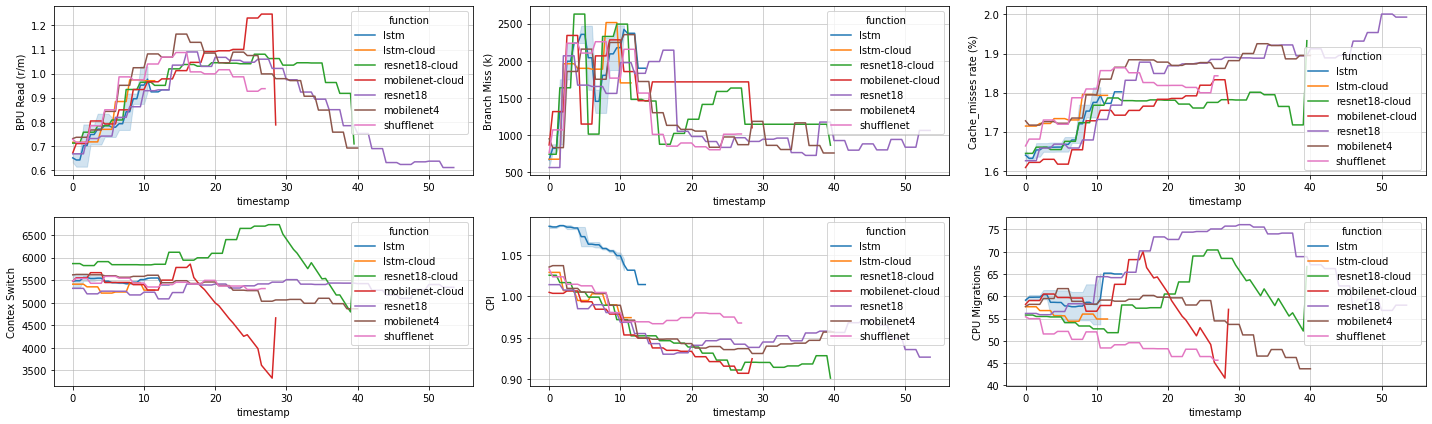

In [6]:
# plot metrics vs time for each function using sns

def plot_metrics_vs_time(df_perf_fn):
    fig, axs = plt.subplots(2, 3, figsize=(20,6))
    axs = axs.ravel()
    for i, ax in enumerate(axs):
        sns.lineplot(x="timestamp", y="value", hue="function", data=df_perf_fn.loc[df_perf_fn['metrics'] == perf_metrics[i]].reset_index(), ax=ax)
        ax.set_ylabel(perf_metrics_name[i])
        ax.grid(True,alpha=0.7)
    plt.tight_layout()
    plt.savefig('plots/metrics_vs_hue_fn.pdf', dpi=500, bbox_inches='tight')
    plt.show()

plot_metrics_vs_time(df_perf_fn)